In [47]:
import numpy as np
import math
import pandas as pd

In [48]:
np.random.seed(123)

In [49]:
def sir(u,parms,t):
    bet,gamm,iota,N,dt=parms
    S,I,R,Y=u
    lambd = bet*(I+iota)/N
    ifrac = 1.0 - math.exp(-lambd*dt)
    rfrac = 1.0 - math.exp(-gamm*dt)
    infection = np.random.binomial(S,ifrac)
    recovery = np.random.binomial(I,rfrac)
    return [S-infection,I+infection-recovery,R+recovery,Y+infection]

def simulate():
    parms = [0.1, 0.05, 0.01, 1000.0, 0.1]
    tf = 360
    tl = 20001
    t = np.linspace(0,tf,tl)
    S = np.zeros(tl)
    I = np.zeros(tl)
    R = np.zeros(tl)
    Y = np.zeros(tl)
    u = [999,1,0,0]
    S[0],I[0],R[0],Y[0] = u
    for j in range(1,tl):
        u = sir(u,parms,t[j])
        S[j],I[j],R[j],Y[j] = u
    return {'t':t,'S':S,'I':I,'R':R,'Y':Y}

In [50]:
simulate()

{'t': array([0.00000e+00, 1.80000e-02, 3.60000e-02, ..., 3.59964e+02,
        3.59982e+02, 3.60000e+02]),
 'S': array([999., 999., 999., ..., 999., 999., 999.]),
 'I': array([1., 1., 1., ..., 0., 0., 0.]),
 'R': array([0., 0., 0., ..., 1., 1., 1.]),
 'Y': array([0., 0., 0., ..., 0., 0., 0.])}

In [51]:
sir_out = pd.DataFrame(simulate())

In [52]:
sir_out

,t,S,I,R,Y
0,0.000,999.0,1.0,0.0,0.0
1,0.018,999.0,1.0,0.0,0.0
2,0.036,999.0,1.0,0.0,0.0
3,0.054,999.0,1.0,0.0,0.0
4,0.072,999.0,1.0,0.0,0.0
...,...,...,...,...,...
19996,359.928,141.0,0.0,859.0,858.0
19997,359.946,141.0,0.0,859.0,858.0
19998,359.964,141.0,0.0,859.0,858.0
19999,359.982,141.0,0.0,859.0,858.0


/home/augusto/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


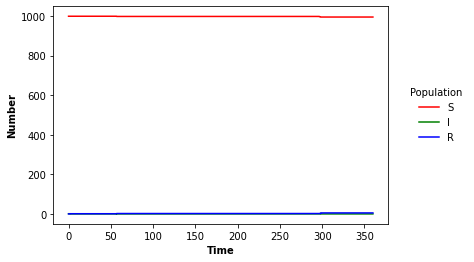

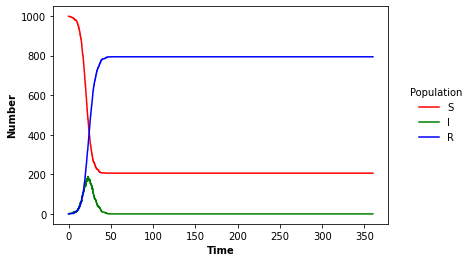

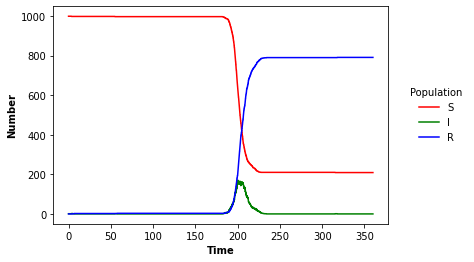

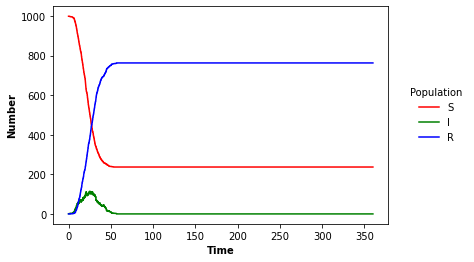

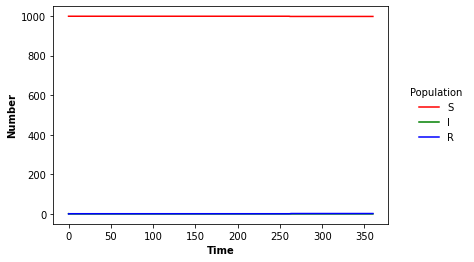

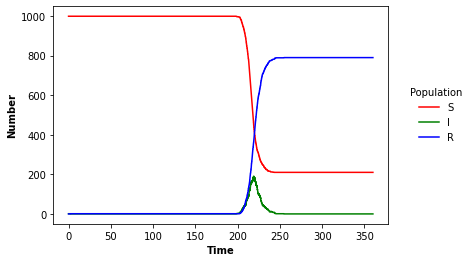

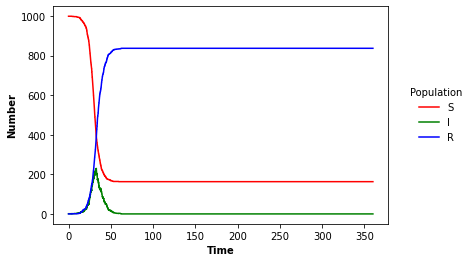

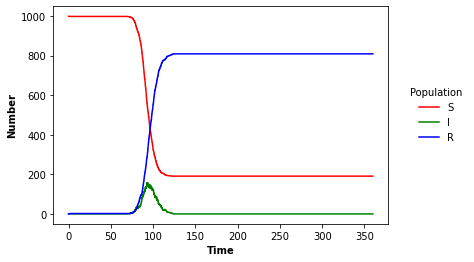

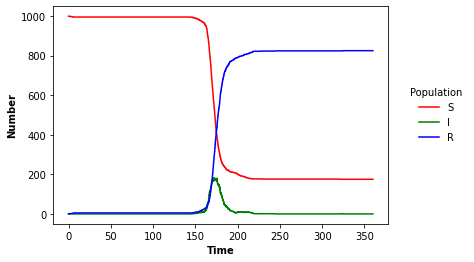

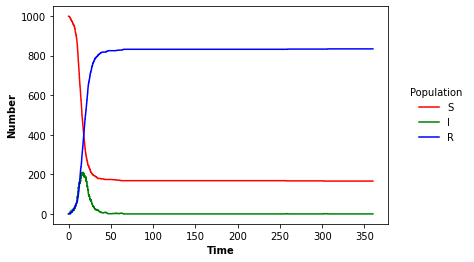

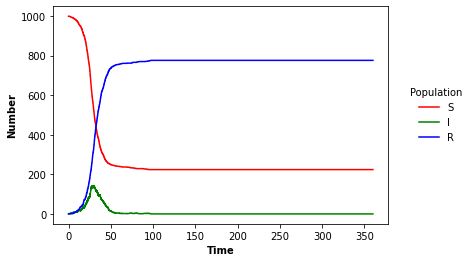

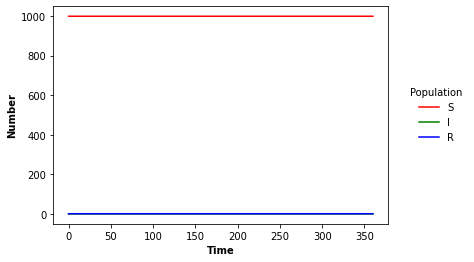

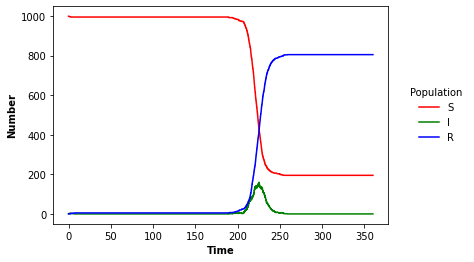

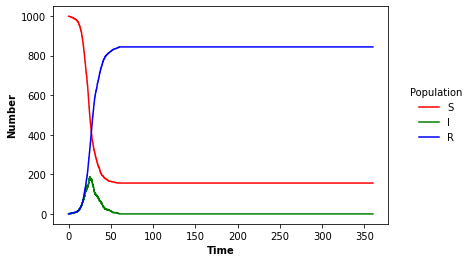

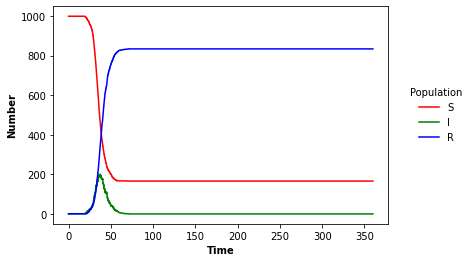

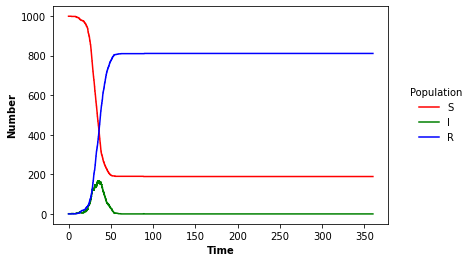

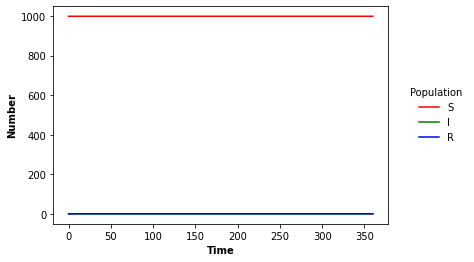

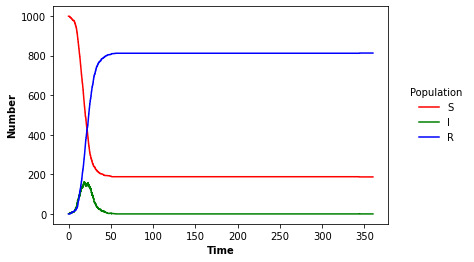

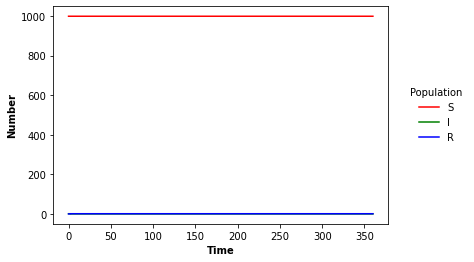

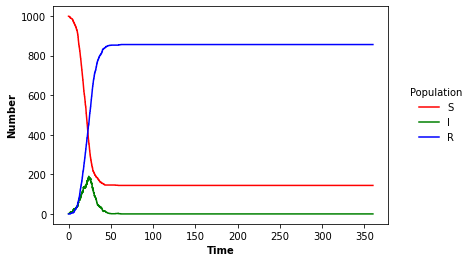

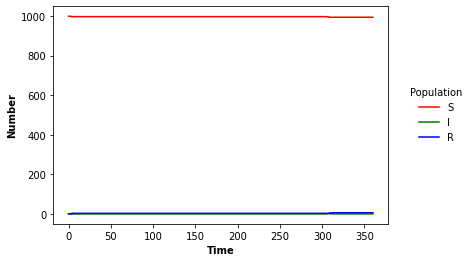

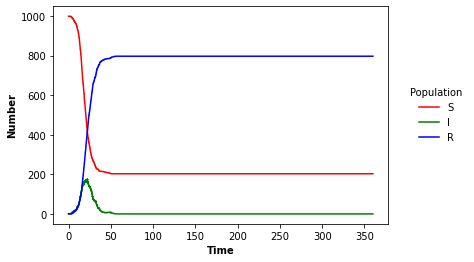

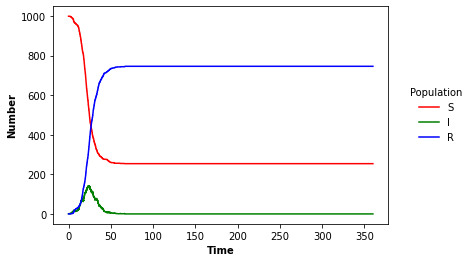

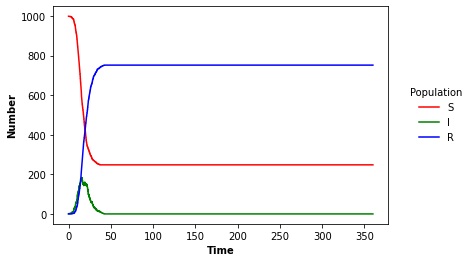

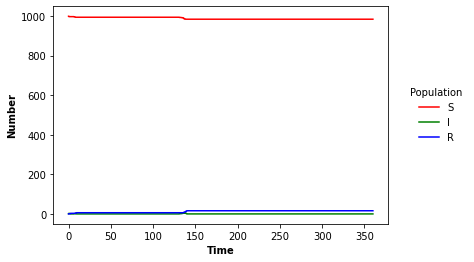

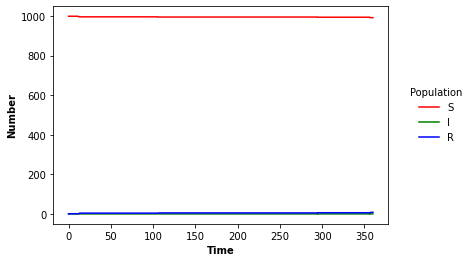

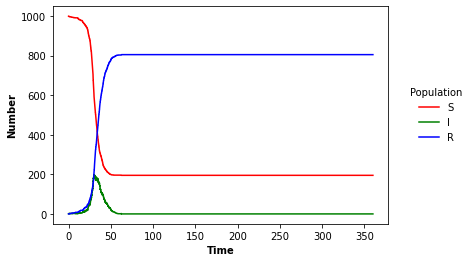

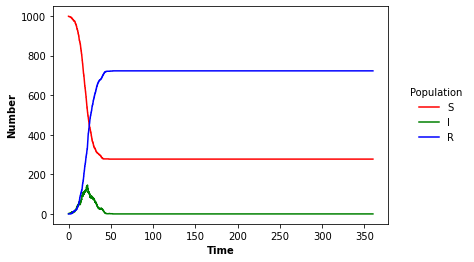

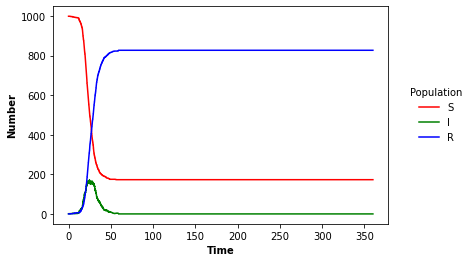

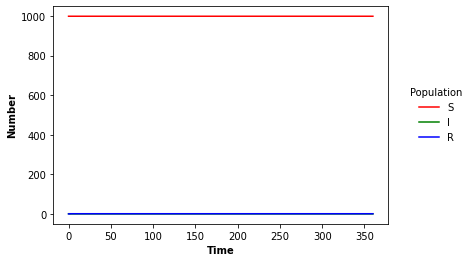

In [53]:
import matplotlib.pyplot as plt
for i in range(30):
    sir_out = pd.DataFrame(simulate())

    plt.figure()
    sline = plt.plot("t","S","",data=sir_out,color="red")
    iline = plt.plot("t","I","",data=sir_out,color="green")
    rline = plt.plot("t","R","",data=sir_out,color="blue")
    plt.xlabel("Time",fontweight="bold")
    plt.ylabel("Number",fontweight="bold")
    legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
    frame = legend.get_frame()
    frame.set_facecolor("white")
    frame.set_linewidth(0)

In [44]:
sir_out['I'].values

array([1., 1., 1., ..., 0., 0., 0.])

In [43]:
np.zeros(len(sir_out))

array([0., 0., 0., ..., 0., 0., 0.])